In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("bench.csv")
df['lookahead'] = df['lookahead'].fillna(0).astype(int)

In [3]:
print("Shape:", df.shape)
print(df.head())

Shape: (1200, 9)
     m    n    k    b  p  q algo  lookahead     gflops
0  512  512  512  128  2  2  p2p          0   5.303895
1  512  512  512  128  2  2  p2p          0   9.304522
2  512  512  512  128  2  2  p2p          0   9.754550
3  512  512  512  128  2  2  p2p          0  13.114243
4  512  512  512  128  2  2  p2p          0   9.743220


In [4]:
set(df['m'])

{512, 1024, 1536, 2048, 3072}

In [5]:
# Ajouter une colonne 'size' pour n = m = k
# df["size"] = df["n"]  # ou moyenne des trois si elles sont différentes

In [9]:
sns.set(style="whitegrid")
params = ['m', 'n', 'k', 'b', 'p', 'q', 'lookahead']

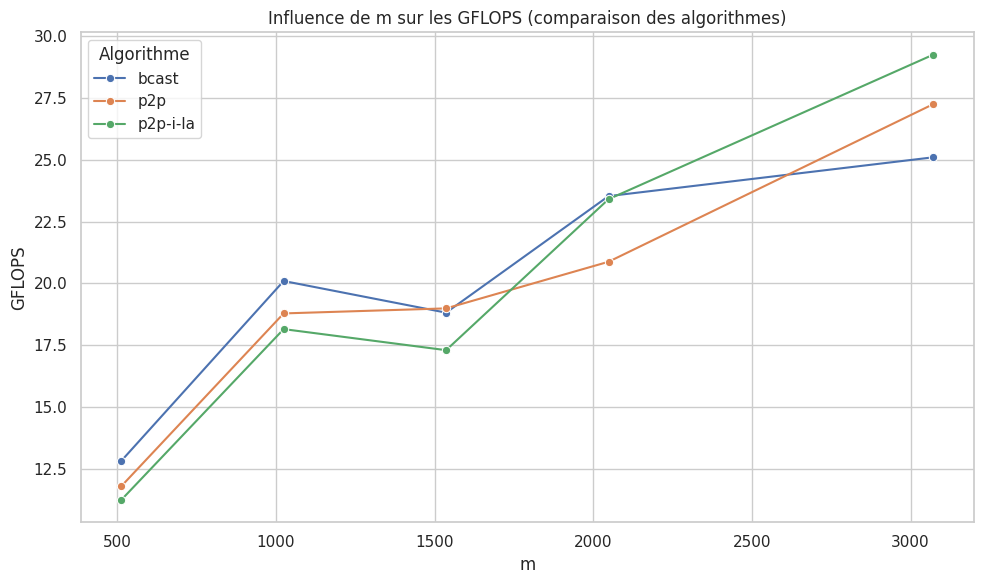

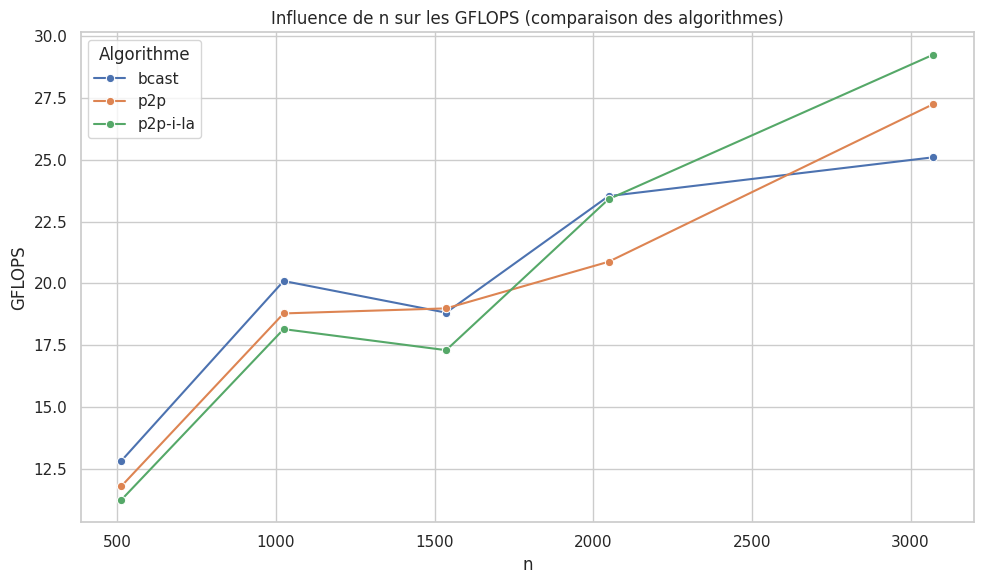

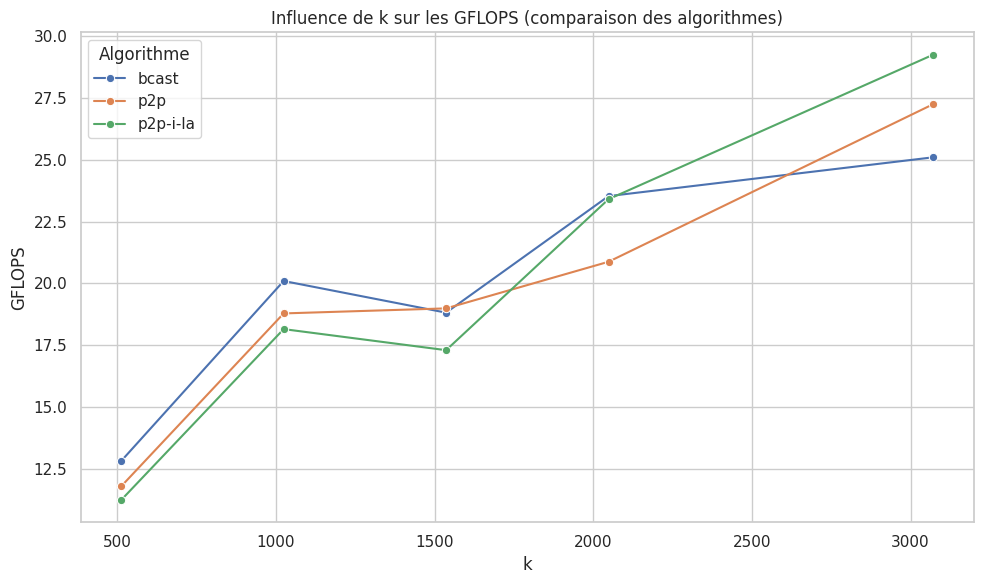

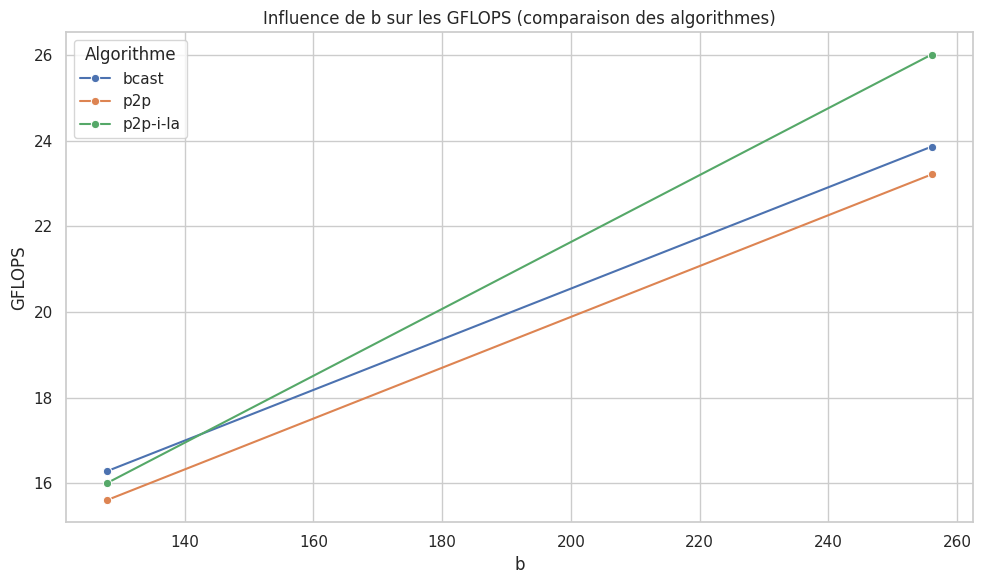

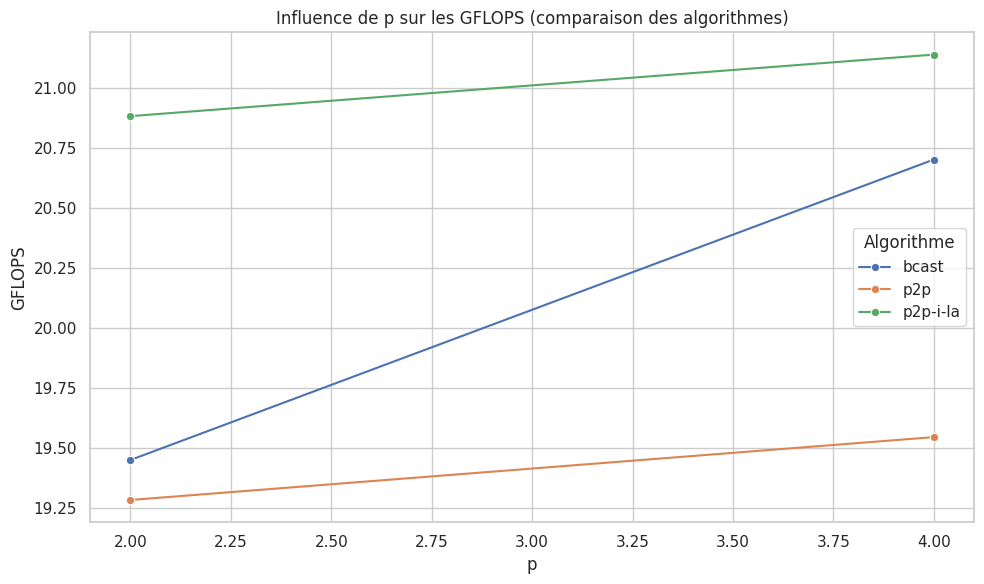

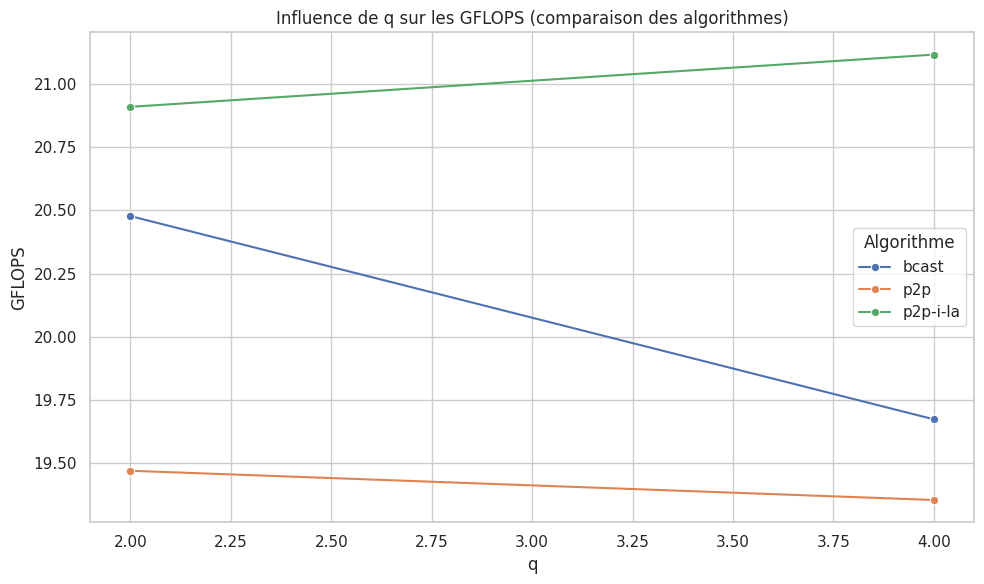

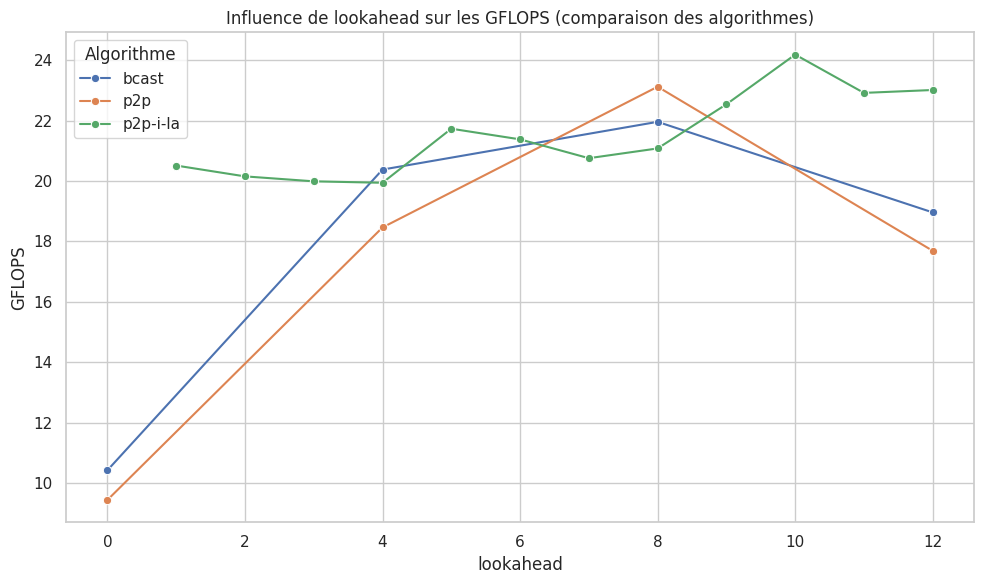

In [8]:
# Pour chaque paramètre, tracer la courbe gflops vs paramètre pour chaque algo
for param in params:
    plt.figure(figsize=(10, 6))
    # Moyenne pour lisser les courbes si plusieurs mesures par point
    df_group = df.groupby([param, 'algo'], as_index=False)['gflops'].mean()
    sns.lineplot(data=df_group, x=param, y='gflops', hue='algo', marker='o')
    plt.title(f"Influence de {param} sur les GFLOPS (comparaison des algorithmes)")
    plt.xlabel(param)
    plt.ylabel("GFLOPS")
    plt.legend(title="Algorithme")
    plt.tight_layout()
    plt.show()

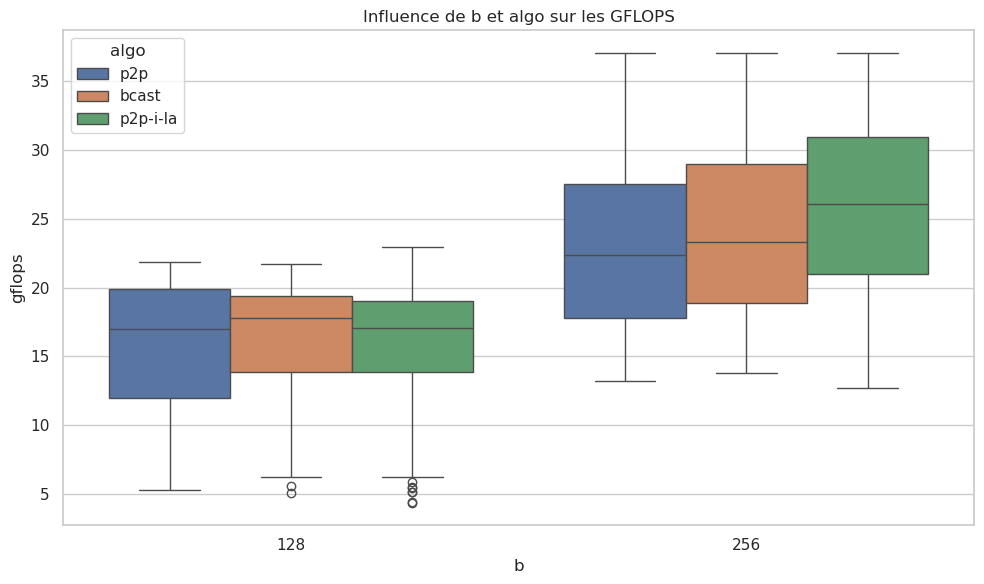

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='b', y='gflops', hue='algo', data=df)
plt.title("Influence de b et algo sur les GFLOPS")
plt.tight_layout()
plt.show()

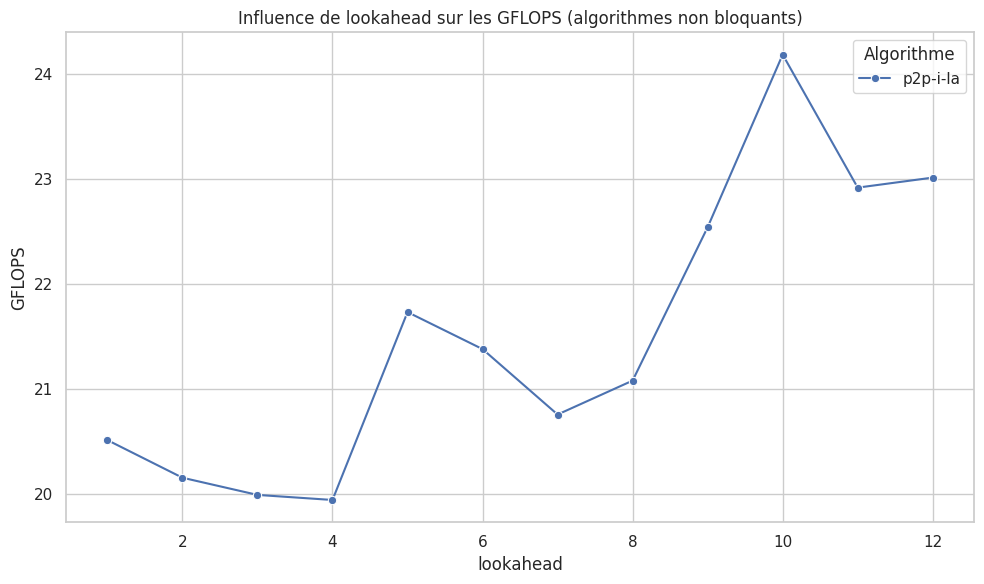

In [11]:
plt.figure(figsize=(10, 6))
df_la = df[df['algo'].str.contains('la')]  # ou ['p2p-i-la'] si tu veux un algo précis
df_group = df_la.groupby(['lookahead', 'algo'], as_index=False)['gflops'].mean()
sns.lineplot(data=df_group, x='lookahead', y='gflops', hue='algo', marker='o')
plt.title("Influence de lookahead sur les GFLOPS (algorithmes non bloquants)")
plt.xlabel("lookahead")
plt.ylabel("GFLOPS")
plt.legend(title="Algorithme")
plt.tight_layout()
plt.show()

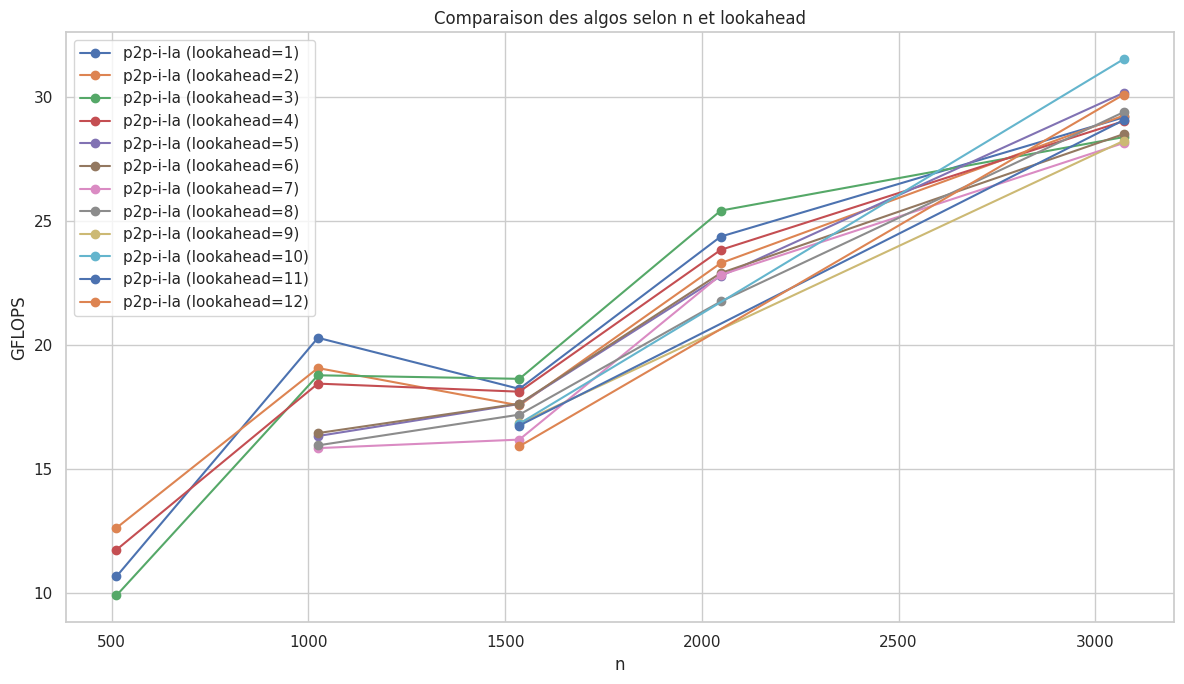

In [14]:
lookahead_vals = sorted(df_la['lookahead'].unique())
size_vals = sorted(df_la[size_param].unique())

plt.figure(figsize=(12, 7))
for algo in df_la['algo'].unique():
    for lookahead in lookahead_vals:
        subset = df_la[(df_la['algo'] == algo) & (df_la['lookahead'] == lookahead)]
        if subset.empty:
            continue
        grouped = subset.groupby(size_param, as_index=False)['gflops'].mean()
        plt.plot(grouped[size_param], grouped['gflops'], marker='o', label=f"{algo} (lookahead={lookahead})")
plt.title(f"Comparaison des algos selon {size_param} et lookahead")
plt.xlabel(size_param)
plt.ylabel("GFLOPS")
plt.legend()
plt.tight_layout()
plt.show()

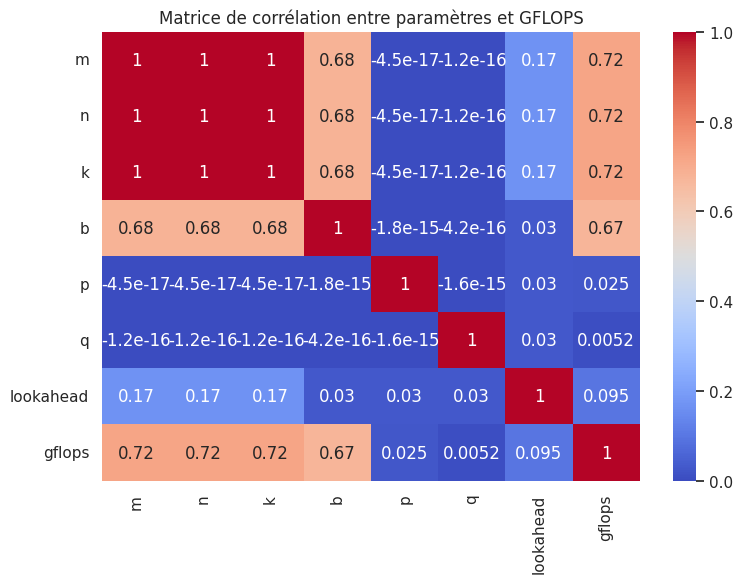

In [10]:
# Corrélation entre les paramètres et les performances
corr = df[params + ['gflops']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation entre paramètres et GFLOPS")
plt.tight_layout()
plt.show()